<a href="https://colab.research.google.com/github/RodriguesL1/DatathonFiap/blob/main/prev_qtd_aluno_passos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from prophet import Prophet



In [2]:
url = '/content/Numero de alunos.xlsx'

In [27]:
df = pd.read_excel(url)

In [4]:
#df= df[['ano','qtd_aluno']]

In [5]:
df.head()

,ds,y
0,2016-01-01,70
1,2017-01-01,300
2,2018-01-01,550
3,2019-01-01,812
4,2020-01-01,841


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      8 non-null      datetime64[ns]
 1   y       8 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 256.0 bytes


In [ ]:
#df=df.rename(columns={'DS': 'ds', 'Y':'y'})

In [7]:
#df['rolling_seasonality'] = df['y'].rolling(window=365).mean()

In [28]:
m = Prophet(yearly_seasonality=True)
#m.add_seasonality(name='custom_seasonality', period=365, fourier_order=5, mode='multiplicative')
m.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4m8q87tg/mwattw_6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4m8q87tg/dbl__rhy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72666', 'data', 'file=/tmp/tmp4m8q87tg/mwattw_6.json', 'init=/tmp/tmp4m8q87tg/dbl__rhy.json', 'output', 'file=/tmp/tmp4m8q87tg/prophet_modeljyrlx1gg/prophet_model-20240326154530.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:45:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:45:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

In [29]:
future_dates = m.make_future_dataframe(periods=3, freq='YS')
future_dates

,ds
0,2016-01-01
1,2017-01-01
2,2018-01-01
3,2019-01-01
4,2020-01-01
5,2021-01-01
6,2022-01-01
7,2023-01-01
8,2024-01-01
9,2025-01-01


In [30]:
df

,ds,y
0,2016-01-01,70
1,2017-01-01,300
2,2018-01-01,550
3,2019-01-01,812
4,2020-01-01,841
5,2021-01-01,824
6,2022-01-01,970
7,2023-01-01,1100


In [31]:
forecast = m.predict(future_dates)


In [34]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


,ds,yhat,yhat_lower,yhat_upper
0,2016-01-01,226.775392,106.391405,359.601071
1,2017-01-01,318.214284,193.896675,457.063527
2,2018-01-01,475.531258,354.765847,603.085452
3,2019-01-01,626.197930,490.741179,751.627827
4,2020-01-01,770.195571,648.330135,890.697883
5,2021-01-01,861.634235,736.202873,989.531496
6,2022-01-01,1018.950984,890.429788,1143.175839
7,2023-01-01,1169.617429,1037.560266,1290.229350
8,2024-01-01,1313.615069,1187.379442,1444.790604
9,2025-01-01,1405.053734,1286.600536,1540.424063


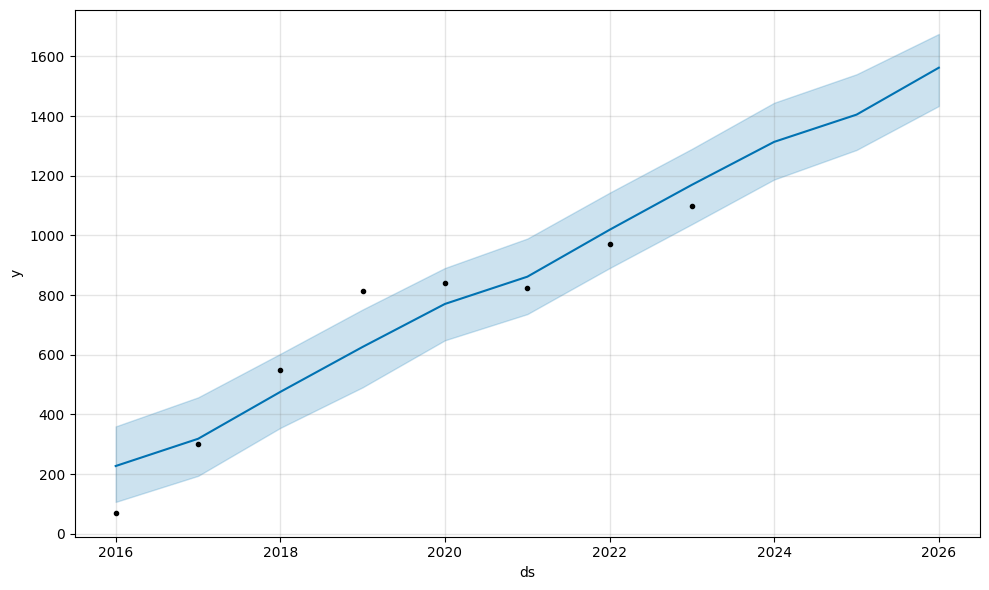

In [33]:
fig1 = m.plot(forecast)
